# FIAP - Sprint 2


---


* Jessica Witzler Costacurta - rm99068
* Márcio Hitoshi Tahyra - rm552511
* Camilly Breitbach Ishida - rm551474
* Julia Leite Galvão - rm550201
* Aline Fernande Zeppelini - rm97966



---


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dados19 = pd.read_csv('obitos-2019.csv')
dados20 = pd.read_csv('obitos-2020.csv')
dados21 = pd.read_csv('obitos-2021.csv')
dados22 = pd.read_csv('obitos-2022.csv')
dados23 = pd.read_csv('obitos-2023.csv')
dados24 = pd.read_csv('obitos-2024.csv')

# Análise dos Dados de 2024

---

**Qual dos tipos de doença teve mais mortes em cada estado?**

In [ ]:
'''
Através deste código, podemos ver qual a doença que prevalecente dentro de cada um dos estados, ou seja,
a que causou mais obitos.
'''

prevalencia_estado = dados24.groupby(['uf', 'tipo_doenca']).agg({'total': 'sum'}).reset_index()
doenca_prevalencia_estado = prevalencia_estado.loc[prevalencia_estado.groupby('uf')['total'].idxmax()]

'''
Aqui nós agrupamos os dados por uf e tipo de doença utilizando o groupby, somamos os casos para cada grupo e
encontramos a doença mais prevalente em cada estado utilizando o loc juntamente com o idxmax, que encontra os
maiores valores.
'''

print(doenca_prevalencia_estado)

     uf tipo_doenca  total
3    AC      OUTRAS    792
10   AL      OUTRAS   3893
17   AM      OUTRAS   3413
24   AP      OUTRAS    460
31   BA      OUTRAS  17139
38   CE      OUTRAS   9976
45   DF      OUTRAS   3326
52   ES      OUTRAS   5317
59   GO      OUTRAS   7231
66   MA      OUTRAS   4938
73   MG      OUTRAS  31994
80   MS      OUTRAS   3151
87   MT      OUTRAS   3713
94   PA      OUTRAS   5833
101  PB      OUTRAS   5434
108  PE      OUTRAS  12012
115  PI      OUTRAS   2193
122  PR      OUTRAS  16089
129  RJ      OUTRAS  29107
136  RN      OUTRAS   3165
143  RO      OUTRAS   1662
150  RR      OUTRAS    361
157  RS      OUTRAS  17963
164  SC      OUTRAS   9694
171  SE      OUTRAS   2410
178  SP      OUTRAS  66827
185  TO      OUTRAS   1244


**Qual o total de óbitos para cada tipo de doença em cada região do país?**

In [ ]:
'''
Aqui, nós buscamos saber a quantidade de óbitos que tivemos em 2024 por cada tipo de doença. Para isso nós dividimos cada estado em sua região
e através do 'map', nós mapeamos cada UF para sua determinada região. Desta forma, conseguimos agrupar, e retirar as informações neces-
sárias somando os números de óbitos por seus tipos de doenças, e separando por região.
'''

uf_regiao_map = {
    'AC': 'Norte', 'AM': 'Norte', 'AP': 'Norte', 'PA': 'Norte', 'RO': 'Norte', 'RR': 'Norte', 'TO': 'Norte',
    'AL': 'Nordeste', 'BA': 'Nordeste', 'CE': 'Nordeste', 'MA': 'Nordeste', 'PB': 'Nordeste', 'PE': 'Nordeste',
    'PI': 'Nordeste', 'RN': 'Nordeste', 'SE': 'Nordeste',
    'DF': 'Centro-Oeste', 'GO': 'Centro-Oeste', 'MT': 'Centro-Oeste', 'MS': 'Centro-Oeste',
    'ES': 'Sudeste', 'MG': 'Sudeste', 'RJ': 'Sudeste', 'SP': 'Sudeste',
    'PR': 'Sul', 'RS': 'Sul', 'SC': 'Sul'
}


dados24['regiao'] = dados24['uf'].map(uf_regiao_map)
prevalenciaregiao = dados24.groupby(['regiao', 'tipo_doenca']).agg({'total': 'sum'}).reset_index()

print(prevalenciaregiao)

          regiao                 tipo_doenca   total
0   Centro-Oeste                       COVID     346
1   Centro-Oeste               INDETERMINADA     142
2   Centro-Oeste  INSUFICIENCIA_RESPIRATORIA    3121
3   Centro-Oeste                      OUTRAS   17421
4   Centro-Oeste                   PNEUMONIA    7739
5   Centro-Oeste                  SEPTICEMIA    5576
6   Centro-Oeste                        SRAG     148
7       Nordeste                       COVID     435
8       Nordeste               INDETERMINADA     714
9       Nordeste  INSUFICIENCIA_RESPIRATORIA   10020
10      Nordeste                      OUTRAS   61160
11      Nordeste                   PNEUMONIA   18853
12      Nordeste                  SEPTICEMIA   20107
13      Nordeste                        SRAG     445
14         Norte                       COVID     186
15         Norte               INDETERMINADA     177
16         Norte  INSUFICIENCIA_RESPIRATORIA    2358
17         Norte                      OUTRAS  

**Qual o total geral de óbitos para cada tipo de doença?**

In [ ]:
'''
Aqui, nós calculamos o valor geral de óbitos por doença. Para conseguirmos isso, nós somamos o o valor total dos óbitos utilizando o 'sum' para
cada tipo de doença. E utilizando o 'groupby', nós agrupamos os dados.
'''

total_obitos = dados24['total'].sum()
total_por_doenca = dados24.groupby('tipo_doenca')['total'].sum().reset_index()

print(total_por_doenca)

                  tipo_doenca   total
0                       COVID    3458
1               INDETERMINADA    3649
2  INSUFICIENCIA_RESPIRATORIA   40370
3                      OUTRAS  269337
4                   PNEUMONIA  100158
5                  SEPTICEMIA   86087
6                        SRAG    1546


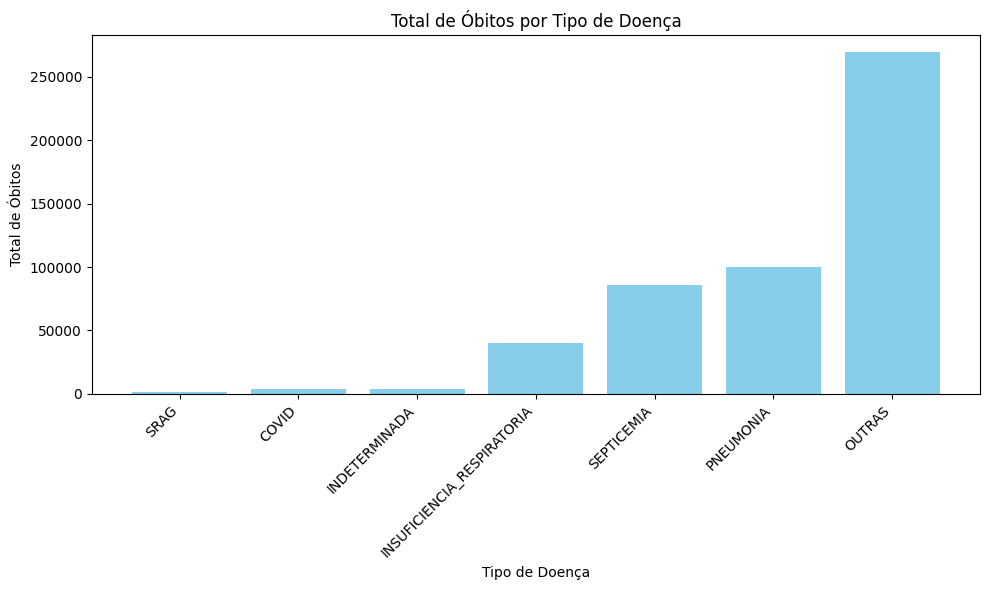

In [ ]:
'''
Nós classificamos os dados em ordem crescente de óbitos, definimos os rótulos dos eixos e o título do gráfico,
ajustamos a rotação dos rótulos do eixo x e, por fim, exibimos o gráfico.
'''

total_por_doenca = total_por_doenca.sort_values(by='total')

plt.figure(figsize=(10, 6))
plt.bar(total_por_doenca['tipo_doenca'], total_por_doenca['total'], color='skyblue')
plt.xlabel('Tipo de Doença')
plt.ylabel('Total de Óbitos')
plt.title('Total de Óbitos por Tipo de Doença')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Qual o total de óbitos em cada região do país?**

In [ ]:
'''
Nós calculamos o total de óbitos por região para sabermos quantas mortes ocorreram no ano de 2024. Para isso, nós utilizamos
novamente o 'groupby' para agrupar os valores e o 'map' para mapear as regiões relacionadas aos óbitos.
'''

uf_regiao_map = {
    'AC': 'Norte', 'AM': 'Norte', 'AP': 'Norte', 'PA': 'Norte', 'RO': 'Norte', 'RR': 'Norte', 'TO': 'Norte',
    'AL': 'Nordeste', 'BA': 'Nordeste', 'CE': 'Nordeste', 'MA': 'Nordeste', 'PB': 'Nordeste', 'PE': 'Nordeste',
    'PI': 'Nordeste', 'RN': 'Nordeste', 'SE': 'Nordeste',
    'DF': 'Centro-Oeste', 'GO': 'Centro-Oeste', 'MT': 'Centro-Oeste', 'MS': 'Centro-Oeste',
    'ES': 'Sudeste', 'MG': 'Sudeste', 'RJ': 'Sudeste', 'SP': 'Sudeste',
    'PR': 'Sul', 'RS': 'Sul', 'SC': 'Sul'
}

dados24['regiao'] = dados24['uf'].map(uf_regiao_map)
total_por_regiao = dados24.groupby('regiao')['total'].sum().reset_index()

print(total_por_regiao)

         regiao   total
0  Centro-Oeste   34493
1      Nordeste  111734
2         Norte   25076
3       Sudeste  253666
4           Sul   79636


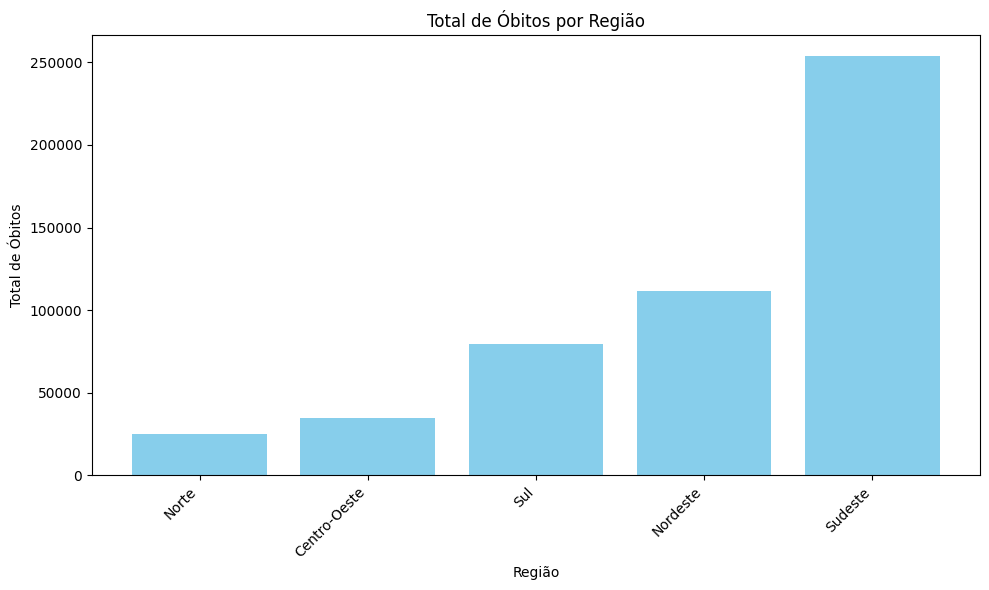

In [ ]:
total_por_regiao = total_por_regiao.sort_values(by='total')

plt.figure(figsize=(10, 6))
plt.bar(total_por_regiao['regiao'], total_por_regiao['total'], color='skyblue')
plt.xlabel('Região')
plt.ylabel('Total de Óbitos')
plt.title('Total de Óbitos por Região')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Qual a distribuição de óbitos por doença nas diferentes regiões do país?**

In [ ]:
'''
Nós juntamos as informações das duas últimas tabelas, em apenas uma para avaliar qual foi o número de óbitos por tipo de doença em
cada região do país.
'''

uf_regiao_map = {
    'AC': 'Norte', 'AM': 'Norte', 'AP': 'Norte', 'PA': 'Norte', 'RO': 'Norte', 'RR': 'Norte', 'TO': 'Norte',
    'AL': 'Nordeste', 'BA': 'Nordeste', 'CE': 'Nordeste', 'MA': 'Nordeste', 'PB': 'Nordeste', 'PE': 'Nordeste',
    'PI': 'Nordeste', 'RN': 'Nordeste', 'SE': 'Nordeste',
    'DF': 'Centro-Oeste', 'GO': 'Centro-Oeste', 'MT': 'Centro-Oeste', 'MS': 'Centro-Oeste',
    'ES': 'Sudeste', 'MG': 'Sudeste', 'RJ': 'Sudeste', 'SP': 'Sudeste',
    'PR': 'Sul', 'RS': 'Sul', 'SC': 'Sul'
}


dados24['regiao'] = dados24['uf'].map(uf_regiao_map)
prevalencia_regiao_doenca = dados24.groupby(['regiao', 'tipo_doenca'])['total'].sum().reset_index()

print(prevalencia_regiao_doenca)

          regiao                 tipo_doenca   total
0   Centro-Oeste                       COVID     346
1   Centro-Oeste               INDETERMINADA     142
2   Centro-Oeste  INSUFICIENCIA_RESPIRATORIA    3121
3   Centro-Oeste                      OUTRAS   17421
4   Centro-Oeste                   PNEUMONIA    7739
5   Centro-Oeste                  SEPTICEMIA    5576
6   Centro-Oeste                        SRAG     148
7       Nordeste                       COVID     435
8       Nordeste               INDETERMINADA     714
9       Nordeste  INSUFICIENCIA_RESPIRATORIA   10020
10      Nordeste                      OUTRAS   61160
11      Nordeste                   PNEUMONIA   18853
12      Nordeste                  SEPTICEMIA   20107
13      Nordeste                        SRAG     445
14         Norte                       COVID     186
15         Norte               INDETERMINADA     177
16         Norte  INSUFICIENCIA_RESPIRATORIA    2358
17         Norte                      OUTRAS  

<Figure size 1200x800 with 0 Axes>

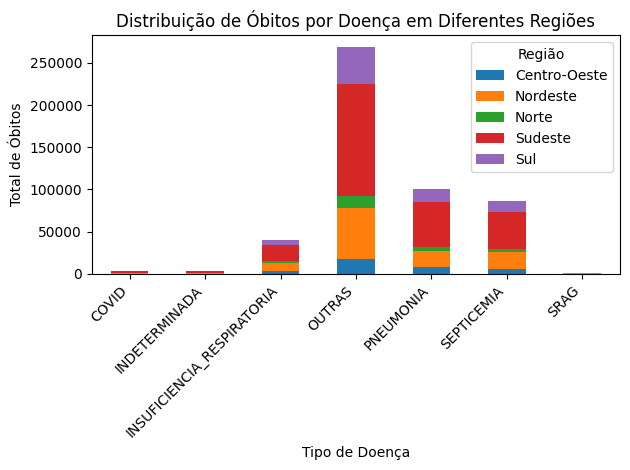

In [ ]:
plt.figure(figsize=(12, 8))
prevalencia_regiao_doenca.pivot_table(index='tipo_doenca', columns='regiao', values='total', aggfunc='sum').plot(kind='bar', stacked=True)
plt.xlabel('Tipo de Doença')
plt.ylabel('Total de Óbitos')
plt.title('Distribuição de Óbitos por Doença em Diferentes Regiões')
plt.legend(title='Região')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Quantidade de óbitos em cada local**


In [ ]:
##Calculamos aqui a quantidades de óbitos que tiveram em cada um dos locais.

total_por_local = dados24.groupby('local_obito')['total'].sum()

print(total_por_local)

local_obito
AMBULANCIA                   46
DOMICILIO                 92646
HOSPITAL                 354819
IGNORADO                   6999
OUTRO                     12650
OUTROS_SERVICOS_SAUDE     30770
POSTO_SAUDE                 191
SAMU                          3
VIA_PUBLICA                6481
Name: total, dtype: int64


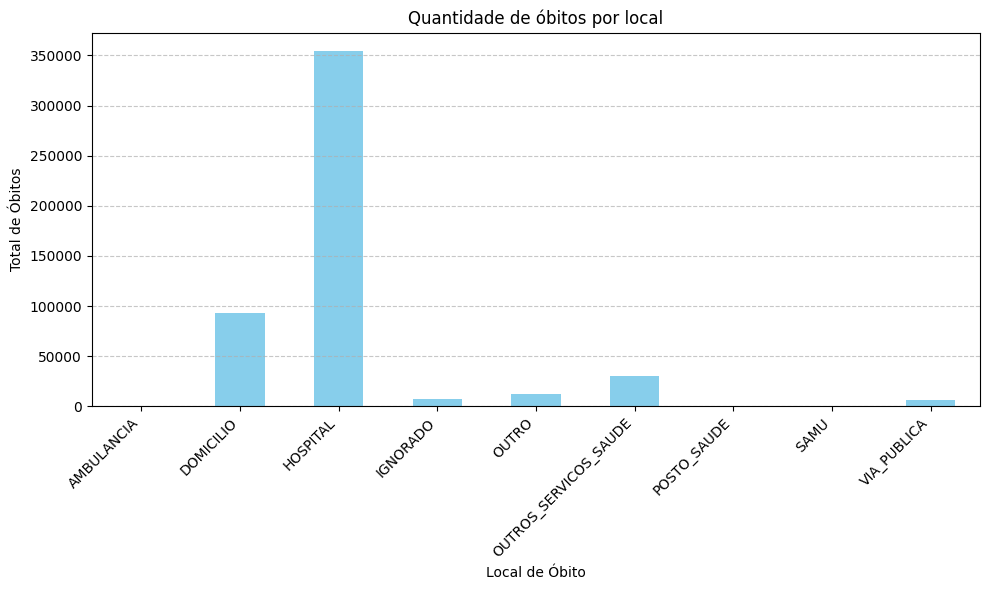

In [ ]:
plt.figure(figsize=(10, 6))
total_por_local.plot(kind='bar', color='skyblue')
plt.title('Quantidade de óbitos por local')
plt.xlabel('Local de Óbito')
plt.ylabel('Total de Óbitos')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Análise da comparação dos dados de 2024 e 2020

---

**Comparação da quantidade de óbitos em 2020 e 2024**

In [ ]:
'''
Fizemos aqui uma comparação na quantidade de óbitos em 2020 e 2024. Fizemos isso agrupando e somando os óbitos
que ocorreram nos dois anos.
'''

total_doenca20 = dados20.groupby('tipo_doenca')['total'].sum()
total_doenca24 = dados24.groupby('tipo_doenca')['total'].sum()

comparacao_doenca = pd.DataFrame({
    '2020': total_doenca20,
    '2024': total_doenca24
})

print(comparacao_doenca)

                              2020    2024
tipo_doenca                               
COVID                       203397    3458
INDETERMINADA                10328    3649
INSUFICIENCIA_RESPIRATORIA  103763   40370
OUTRAS                      727301  269337
PNEUMONIA                   188174  100158
SEPTICEMIA                  168605   86087
SRAG                         17345    1546


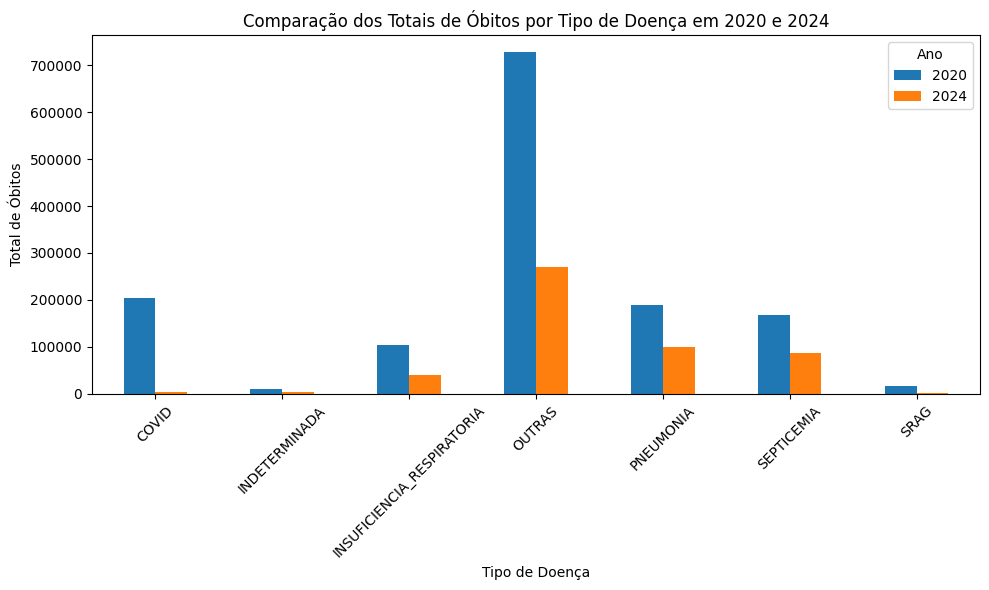

In [ ]:
comparacao_doenca.plot(kind='bar', figsize=(10, 6))
plt.title('Comparação dos Totais de Óbitos por Tipo de Doença em 2020 e 2024')
plt.xlabel('Tipo de Doença')
plt.ylabel('Total de Óbitos')
plt.xticks(rotation=45)
plt.legend(title='Ano')
plt.tight_layout()
plt.show()

**Comparação de óbitos por unidade federativa nos anos de 2024 e 2020**

In [ ]:
# Nós agrupamos os dados por unidade federativa e somamos os óbitos dois dois anos para compará-los.
obitos_por_uf20 = dados20.groupby('uf')['total'].sum()
obitos_por_uf24 = dados24.groupby('uf')['total'].sum()

dados_uf = pd.DataFrame({'2020': obitos_por_uf20, '2024': obitos_por_uf24})

print(dados_uf)

      2020    2024
uf                
AC    4486    1449
AL   22191    7028
AM   19469    5618
AP    3386     923
BA   89434   28725
CE   58325   19576
DF   17756    6934
ES   28113   10073
GO   39489   14569
MA   29436    8156
MG  143443   59772
MS   18015    6350
MT   19247    6640
PA   34889   11254
PB   29193   10341
PE   71021   23023
PI   16535    4154
PR   75346   29015
RJ  167761   54437
RN   18990    6230
RO    9650    2961
RR    3051     620
RS   88404   33132
SC   43517   17489
SE   13605    4501
SP  347729  129384
TO    6432    2251


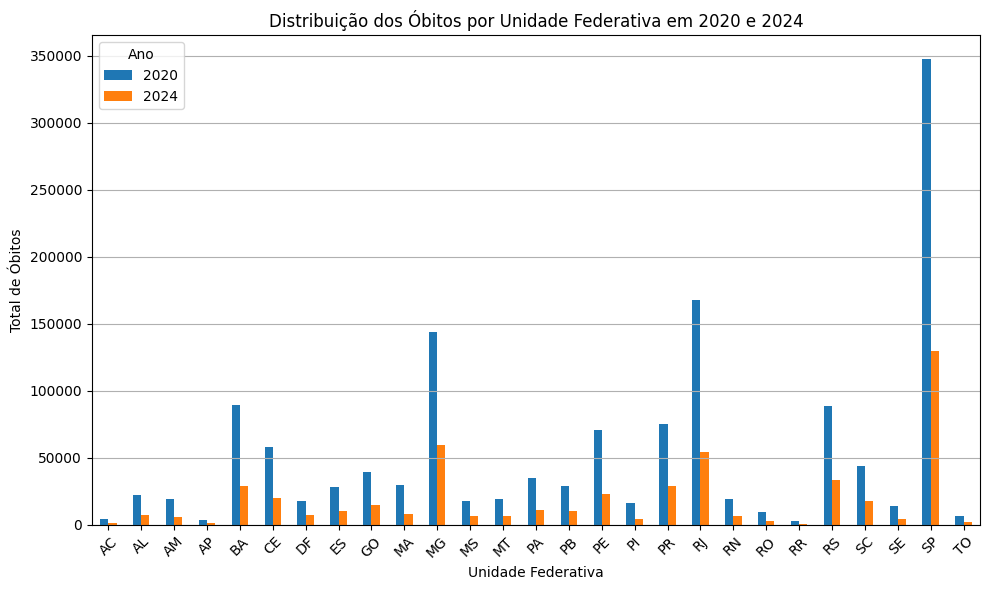

In [ ]:
dados_uf.plot(kind='bar', figsize=(10, 6))
plt.title('Distribuição dos Óbitos por Unidade Federativa em 2020 e 2024')
plt.xlabel('Unidade Federativa')
plt.ylabel('Total de Óbitos')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Ano')
plt.tight_layout()
plt.show()

# Avaliação dos Óbitos por Sexo e Faixa Etária

---


**Total de óbitos por Sexo**

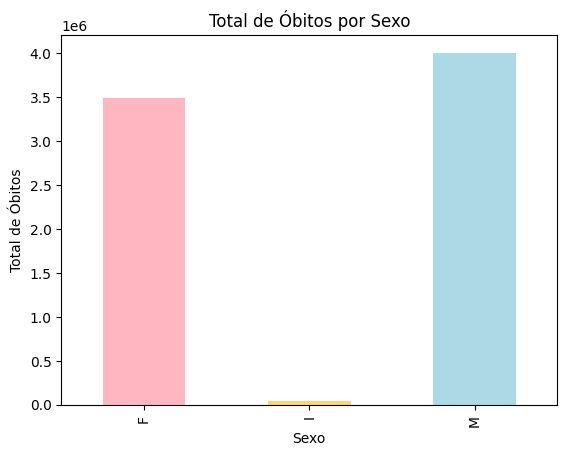

In [ ]:
# Aqui nós agrupamos e calculamos o total de óbitos por sexo, para criar o gráfico.

dados = pd.concat([dados19, dados20, dados21, dados22, dados23, dados24], ignore_index=True)

total_sexo = dados.groupby('sexo')['total'].sum()

sexo_idade = dados.pivot_table(values='total', index='faixa_etaria', columns='sexo', aggfunc=np.sum, fill_value=0)
sexo_local = dados.pivot_table(values='total', index='local_obito', columns='sexo', aggfunc=np.sum, fill_value=0)

cores = {'M': '#ADD8E6', 'F': '#FFB6C1', 'I': '#FFD580'}

total_sexo.plot(kind='bar', color=[cores.get(x, '#D3D3D3') for x in total_sexo.index], title='Total de Óbitos por Sexo', ylabel='Total de Óbitos', xlabel='Sexo')
plt.show()

**Óbitos por sexo e faixa etária**

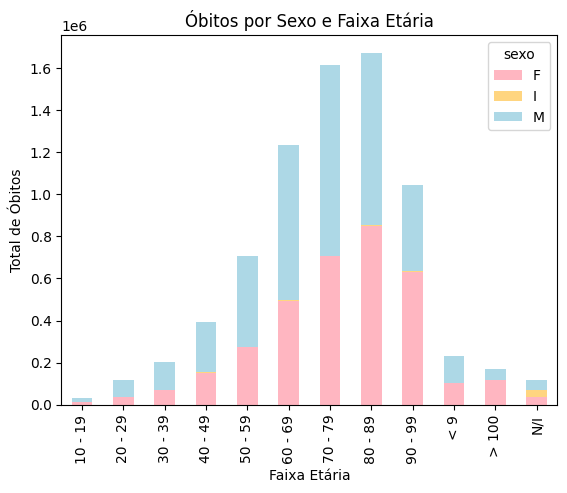

In [ ]:
sexo_idade.plot(kind='bar', stacked=True, color=[cores.get(x, '#D3D3D3') for x in sexo_idade.columns], title='Óbitos por Sexo e Faixa Etária', ylabel='Total de Óbitos', xlabel='Faixa Etária')
plt.show()

**Óbitos por sexo e local**

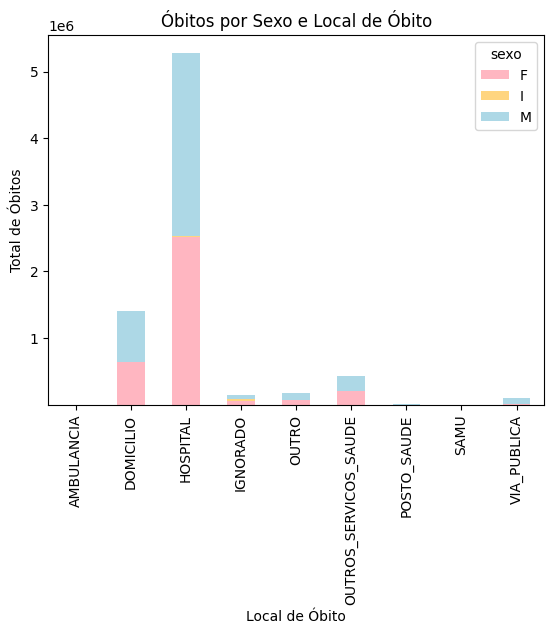

In [ ]:
sexo_local.plot(kind='bar', stacked=True, color=[cores.get(x, '#D3D3D3') for x in sexo_local.columns], title='Óbitos por Sexo e Local de Óbito', ylabel='Total de Óbitos', xlabel='Local de Óbito')
plt.show()